In [98]:
import pandas as pd
import numpy as np
import re

In [65]:
df = pd.read_csv('./dsotm_reviews.csv')

In [66]:
pd.options.display.max_colwidth = 1000
df.sample(4)

,Review,Rating
1075,"""I think I creamed myself when I got this for my bday (original vinyl). I guess the only way you can actually review an album like this is if its a negative review cause if you like it everyone knows why its good.nn1. Speak to Me (un-rated)n2. Breathe (5/5)n3. On the Run (3/5)n4. Timen5. The Great Gig in the Sky (4/5)n6. Moneyn7. Us and Them (5/5)n8. Any Colour You Like (5/5)n9. Brain Damagen10. EclipsennOverall: 4.666...nGreatest songs ever: 3 (Brain Damage/Eclipse counted as one)nCover art: 2nd best ever duhnOverall: 5/5""",5.0
470,9.9 Literally made me feel at peace with the world the first time I heard it.,5.0
463,"As a teenager way back when I loved this album. Hell I actually loved Pink Floyd. That was before I discovered alternative music in the mid to late 80s. The new bands I liked were almost anti-Pink Floyd. No pomp No progressive rock. And I found that I liked my music that way much better so I quit listening to Pink Floyd and the other AOR bands. But lately I decided to give them another chance and Im glad I did. This is a very good album. Its not great and it certainly isnt one of my all-time favorites but I really enjoyed listening to it after all this time. Im surprised at how much I liked it. All in all Im happy I gave this album another chance. I would recommend this album to any music lover. The standout tracks are ""Breathe"" ""Time"" and ""Us And Them"". Definitely check this out.",3.5
584,"Theres not much to really say about this album. It is simply perfection with not a bad track on here. Money is the only one thats suspect not quite living up to the darkness set up by the rest of the album but even that can shine in its own right. Its no wonder that this was on the Billboard Charts for a million weeks I could see this being tight enough to be liked by pop fans but psychedelic and smart enough to be embraced by the more stereotypically ""intelligent"" crowd.",5.0


In [67]:
#drop nan values
df = df[(df['Review'].notna())]
df = df[(df['Rating'].notna())]

# Sentiment analysis

For the sentiment analysis, Textblob library is used.
The sentiment property returns a named tuple of the form Sentiment (polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [68]:
from textblob import TextBlob

def get_polarity(text):
    text_blob = TextBlob(text)
    return text_blob.sentiment.polarity

def get_subjectivity(text):
    text_blob = TextBlob(text)
    return text_blob.sentiment.subjectivity

# Reviews readability and complexity analysis

In [69]:
import textstat
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['la','de','que','like','nn'])

def get_avg_word_len(text):
    """return average word length for the input text """
    words = text.split()
    word_len = 0
    for word in words:
        word_len = word_len + len(word)
    return word_len/len(words)


def get_readability(text):
    """
    Score	Understood by
    4.9 or lower	average 4th-grade student or lower
    5.0–5.9	average 5th or 6th-grade student
    6.0–6.9	average 7th or 8th-grade student
    7.0–7.9	average 9th or 10th-grade student
    8.0–8.9	average 11th or 12th-grade student
    9.0–9.9	average 13th to 15th-grade (college) student  
    """

    score = textstat.dale_chall_readability_score(text)
    return score

def get_reading_ease(text):
    """
    Score	Difficulty
    90-10	Very Easy
    80-89	Easy
    70-79	Fairly Easy
    60-69	Standard
    50-59	Fairly Difficult
    30-49	Difficult
    0-29	Very Confusing
    """
    score = textstat.flesch_reading_ease(text)
    return score


def get_difficult_words(text):
    score = textstat.difficult_words(text)
    return score

In [70]:
def extract_features(df,col):
    
    df['polarity'] = df[col].apply(lambda x:get_polarity(x)) 
    df['subjectivity'] = df[col].apply(lambda x:get_subjectivity(x)) 
    
    df['readability_score'] = df[col].apply(lambda x:get_readability(x)) 
    df['reading_ease'] = df[col].apply(lambda x: get_reading_ease(x))
    df['difficult_words'] = df[col].apply(lambda x:get_difficult_words(x)) 
    
    
    df['count']=df[col].apply(lambda x: len(str(x).split()))
    df['char count']=df[col].apply(lambda x: len(x))
    df['avg word_len'] = df[col].apply(lambda x:get_avg_word_len(x))
    df['stop_words_len'] = df[col].apply(lambda x: len([t for t in x.split() if t in stop_words]))

In [71]:
extract_features(df,'Review')

In [72]:
df.sample(1)

,Review,Rating,polarity,subjectivity,readability_score,reading_ease,difficult_words,count,char count,avg word_len,stop_words_len
438,"I was introduced to David Gilmours music by my biology teacher and decided to check out this whole ""Pink Floyd"" thing soon after. Dark Side of the Moon is one of the very very few albums that Ive ever heard and immediately thought ""this is one of the best albums Ill ever hear."" By no stretch would I call this experience ""over-rated.""",5.0,0.031667,0.421667,7.46,67.38,7,62,335,4.419355,23


In [73]:
df._get_numeric_data().columns

Index(['Rating', 'polarity', 'subjectivity', 'readability_score',
       'reading_ease', 'difficult_words', 'count', 'char count',
       'avg word_len', 'stop_words_len'],
      dtype='object')

In [74]:
def print_average_scores(df):
    for col in df._get_numeric_data().columns:
        print('Average '+str(col)+':',df[col].mean())
                
print_average_scores(df)

Average Rating: 4.393574297188755
Average polarity: 0.25249066311190177
Average subjectivity: 0.5115248989356364
Average readability_score: 9.407014725568956
Average reading_ease: 71.06890896921018
Average difficult_words: 21.22690763052209
Average count: 137.77175368139223
Average char count: 766.5548862115127
Average avg word_len: 4.7051189995190645
Average stop_words_len: 53.08701472556894


# Plotting distributions

<AxesSubplot:xlabel='Rating', ylabel='Count'>

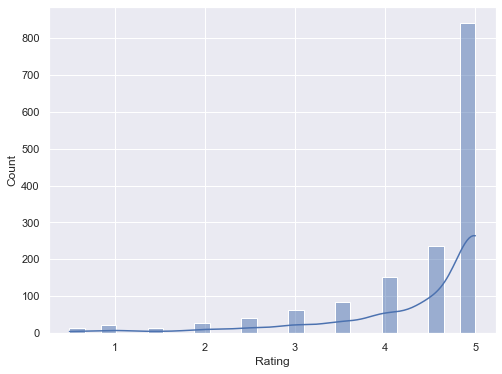

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={"figure.figsize": (8, 6)})
sns.histplot(df.Rating, kde=True)

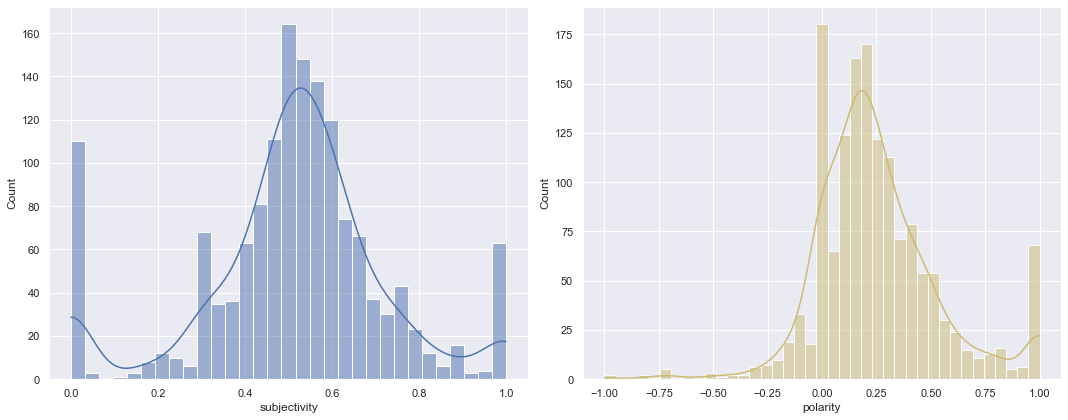

In [76]:
import seaborn as sns

x1, x2 =  df.subjectivity, df.polarity

# plot
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(15)


sns.histplot(x1, kde=True, ax=ax1)
sns.histplot(x2, kde=True, ax=ax2, color="y")
plt.tight_layout()


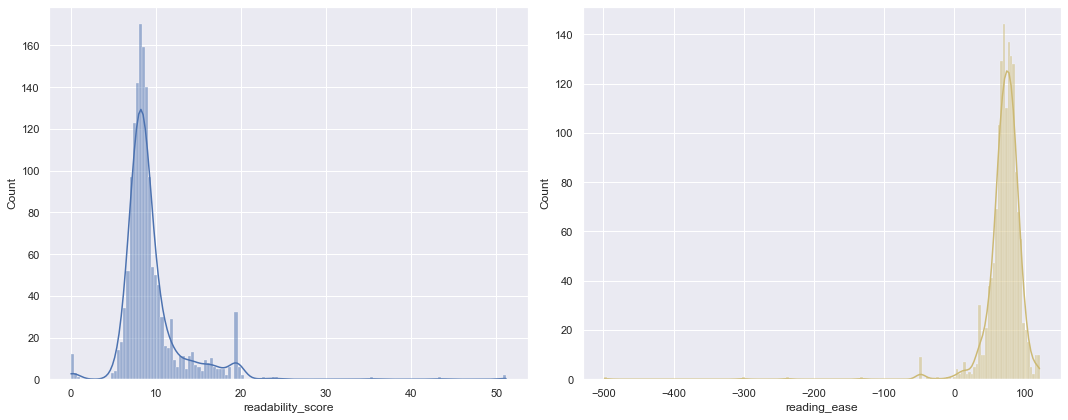

In [77]:
x3, x4 =  df.readability_score, df.reading_ease

fig, (ax3, ax4) = plt.subplots(1,2)
fig.set_figheight(6)
fig.set_figwidth(15)


sns.histplot(x3, kde=True, ax=ax3)
sns.histplot(x4, kde=True, ax=ax4, color="y")
plt.tight_layout()

# Most common words and phrases in all reviews

In [110]:
#removing words we know will appear with a high frequency, but are not meaningful for the analysis 
import re

def clean_reviews(data):
    clean_revs = []
    for rev in data:
        rev = re.sub('(pink|floyd|dark|side|moon|nn)',' ',rev.lower())
        clean_revs.append(rev)
    return clean_revs

df['clean_reviews'] = clean_reviews(df.Review)

In [112]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer


def get_top_ngrams(corpus, ngram_range, stop_words=None, n=None):
    
    vec = CountVectorizer(stop_words=stop_words, ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    
    sum_words = bag_of_words.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    common_words = words_freq[:n]
    words = []
    freqs = []
    for word, freq in common_words:
        words.append(word)
        freqs.append(freq)
        
    df = pd.DataFrame({'Word': words, 'Freq': freqs})
    return df


In [113]:
n = 10
stop_words = stopwords.words('english')
stop_words.extend(['la','de','que','like','nn']) 
unigrams_all = get_top_ngrams(df.clean_reviews, (1, 1), stop_words, n)
bigrams_all = get_top_ngrams(df.clean_reviews, (2, 2), stop_words, n)

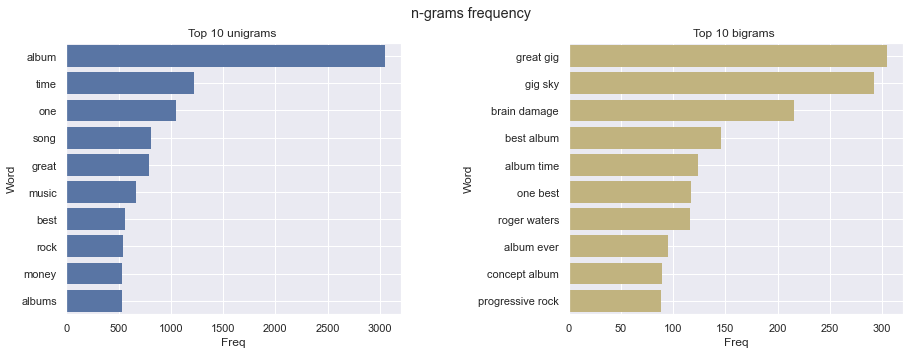

In [114]:
sns.set_style("darkgrid")


sns.set()
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(15,5))
plt.subplots_adjust(wspace=0.5)
fig.suptitle('n-grams frequency')
axes[0].set_title('Top 10 unigrams ')
axes[1].set_title('Top 10 bigrams ')

sns.barplot(ax=axes[0], x='Freq', y='Word', data=unigrams_all ,color='b', linewidth=0)
axes[0].grid(axis="y")
sns.barplot(ax=axes[1], x='Freq', y='Word', data=bigrams_all ,color='y', linewidth=0)
axes[1].grid(axis="y")

# Extracting nouns and adjectives 

In [115]:
def get_nouns(texts):
    nouns = []
    for text in texts:
        text_nouns = []
        blob_object = TextBlob(text)
        for word,tag in blob_object.tags:
            if tag.startswith('NN') and word!='didn' and len(word)!=1:
                text_nouns.append(word)
        nouns.append(text_nouns)
    return nouns

def get_adj(texts):
    adj = []
    for text in texts:
        text_adj = []
        blob_object = TextBlob(text)
        for word,tag in blob_object.tags:
            if tag.startswith('JJ') and len(word)!=1:
                text_adj.append(word)
        adj.append(text_adj)
    return adj
        
df['nouns'] = get_nouns(df.clean_reviews.values)
df['adjectives'] = get_adj(df.clean_reviews.values)

In [116]:
df.sample(2)

,Review,Rating,polarity,subjectivity,readability_score,reading_ease,difficult_words,count,char count,avg word_len,stop_words_len,clean_reviews,nouns,adjectives
59,for those who know a little bit of history those will know that this album has changed completely the world music panorama this album has put progressive rock music and experimentation where they never would be again - it has made people to love and respect progressive music and for almost 10 years progressive music was at every peoples mouthes this album marked deffinitely the beginning of a new erannwhat pink floyd did particularly producer alan parsons was transforming the bands experimental ideas in the form of superbly produced sofisticated songs in fact the album is so well produced that is astounding almost unbelievable to know it was edited in 1973 the album shows so many variations from all sorts of atmospheric sounds to gospel overblown singing blended in a very delicate and high sensible way creating a magnanimous piece of art - a true movie for the ears - with its several different pieces pink floyd surely have moved towards pop in the sense they put a fantastic effort ...,5.0,0.152008,0.597440,9.20,59.94,40,222,1305,4.882883,84,for those who know a little bit of history those will know that this album has changed completely the world music panorama this album has put progressive rock music and experimentation where they never would be again - it has made people to love and respect progressive music and for almost 10 years progressive music was at every peoples mouthes this album marked deffinitely the begi ing of a new era what did particularly producer alan parsons was transforming the bands experimental ideas in the form of superbly produced sofisticated songs in fact the album is so well produced that is astounding almost unbelievable to know it was edited in 1973 the album shows so many variations from all sorts of atmospheric sounds to gospel overblown singing blended in a very delicate and high sensible way creating a magnanimous piece of art - a true movie for the ears - with its several different pieces surely have moved towards pop in the sense they put a fantastic effort in a way people ...,"[bit, history, album, world, music, panorama, album, rock, music, experimentation, people, music, years, music, peoples, album, begi, ing, era, producer, alan, parsons, bands, ideas, form, songs, fact, album, album, variations, sorts, sounds, way, piece, art, movie, ears, pieces, towards, pop, sense, effort, way, people, way, music, influences, hundreds, bands, albuns, times, rock, fan, collection]","[little, progressive, progressive, progressive, new, experimental, sofisticated, unbelievable, many, atmospheric, delicate, high, sensible, magnanimous, true, several, different, fantastic, difficult, pop, influentional, hisher, essencial, influential, classic]"
54,nice combo of soft rock and useless experimentations it has its own charm and the transitions between the songs makes it to be a great listening experience its not really original or innovative but it should be a nice introduction to anyone interesed into progressive rock or even into music because it has a lot of great ideas and styles melded in a daring good simple short and accesible albumnntwo sides its always nice to listen to music as i was listening in two sides it changes the way in which you listen to the album this starts with a very short song well there is an introduction but its probably some samples its merely soft melody with a great arragment that falls into on the run the first experimental track in here it starts with some fast drumming and its mainly a repetitive synth line that draws the base for other synth effects to come by its not really a song and i dont think that there is any main melody in here after the sound of an explosion we fall into the next trackn...,3.0,0.229864,0.527556,8.61,42.62,79,722,3960,4.486150,327,nice combo of soft rock and useless experimentations it has

In [117]:
#let's assume that Ratings above 3.5 are higher ratings, and the ones below lower ratings

df_higher = df[df.Rating > 3.0]
df_lower = df[df.Rating <= 3.0]

In [118]:
nouns_higher = []
nouns_lower = []
for nouns_ls in df_higher.nouns:
    nouns_higher.extend(nouns_ls)
for nouns_ls in df_lower.nouns:
    nouns_lower.extend(nouns_ls)
    
adj_higher = []
adj_lower = []
for adj_ls in df_higher.adjectives:
    adj_higher.extend(adj_ls)
for adj_ls in df_lower.adjectives:
    adj_lower.extend(adj_ls)

In [119]:
from collections import Counter

c = Counter(adj_higher)
print(c.most_common(50))

[('great', 700), ('best', 491), ('good', 335), ('other', 254), ('first', 248), ('un', 222), ('more', 221), ('many', 219), ('greatest', 209), ('much', 202), ('classic', 164), ('perfect', 147), ('such', 119), ('most', 116), ('whole', 113), ('una', 111), ('new', 110), ('ive', 109), ('favorite', 109), ('progressive', 104), ('musical', 101), ('beautiful', 101), ('better', 100), ('same', 95), ('little', 94), ('album', 93), ('different', 86), ('high', 85), ('few', 84), ('only', 82), ('single', 80), ('instrumental', 80), ('least', 78), ('own', 77), ('amazing', 77), ('top', 75), ('bad', 73), ('last', 72), ('final', 71), ('next', 70), ('que', 69), ('true', 67), ('fantastic', 65), ('old', 60), ('brilliant', 59), ('psychedelic', 59), ('big', 57), ('sound', 56), ('popular', 56), ('long', 55)]


In [120]:
c = Counter(adj_lower)
print(c.most_common(50))

[('great', 89), ('good', 78), ('other', 55), ('more', 44), ('much', 40), ('un', 39), ('best', 38), ('bad', 35), ('ive', 30), ('most', 26), ('such', 26), ('many', 24), ('first', 24), ('same', 24), ('least', 23), ('whole', 20), ('own', 19), ('little', 18), ('album', 18), ('better', 17), ('big', 16), ('boring', 16), ('main', 15), ('une', 15), ('hard', 15), ('sure', 14), ('new', 14), ('musical', 14), ('only', 14), ('pretty', 13), ('vocal', 13), ('different', 13), ('le', 13), ('few', 13), ('special', 13), ('overrated', 13), ('est', 12), ('cest', 11), ('old', 11), ('second', 11), ('simple', 11), ('dont', 11), ('progressive', 10), ('instrumental', 10), ('impressive', 10), ('synth', 10), ('interesting', 10), ('nice', 10), ('average', 10), ('entire', 10)]
